In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import main
import model as m
reload(m)
reload(main)

<module 'main' from 'main.pyc'>

# Set here the values for the tuned parameters!

In [4]:
results = [(('conf_media', 'susp_media'), -0.39715252168074283),
 (('media_pos_sent', 'sent_pvv'), 0.5324748118679175),
 (('media_neg_sent', 'sent_pvv'), -0.17527839633555398),
 (('num_posts', 'awareness_pvv'), 0.958395963888157),
 (('sent_pvv', 'sent_pvv'), 0.8112888451246952),
 (('awareness_pvv', 'awareness_pvv'), 0.8049934920293852),
 (('sent_pvv', 'awareness_pvv'), 0.07412576438902689),
 (('awareness_pvv', 'sent_pvv'), 1e-10),
 (('sent_pvv', 'conf_pvv'), 0.9951226405062756),
 (('conf_pvv', 'sent_pvv'), 0.4128353070104019),
 (('susp_media', 'conf_pvv'), 0.03135915021358986),
 (('conf_pvv', 'polls'), 0.13189110097964196)]

In [7]:
# Get DF working with all the data
df = main.prep_df()

# Initiate graph (with standard edges)
graph, parameters = main.generate_graph(df, results)

In [8]:
#Run the model with the results 
g = m.run_model(graph)
# Get the cost of the best result
new_cost = m.calc_error(g)

In [9]:
new_cost

3.6873562442427894

In [10]:
g

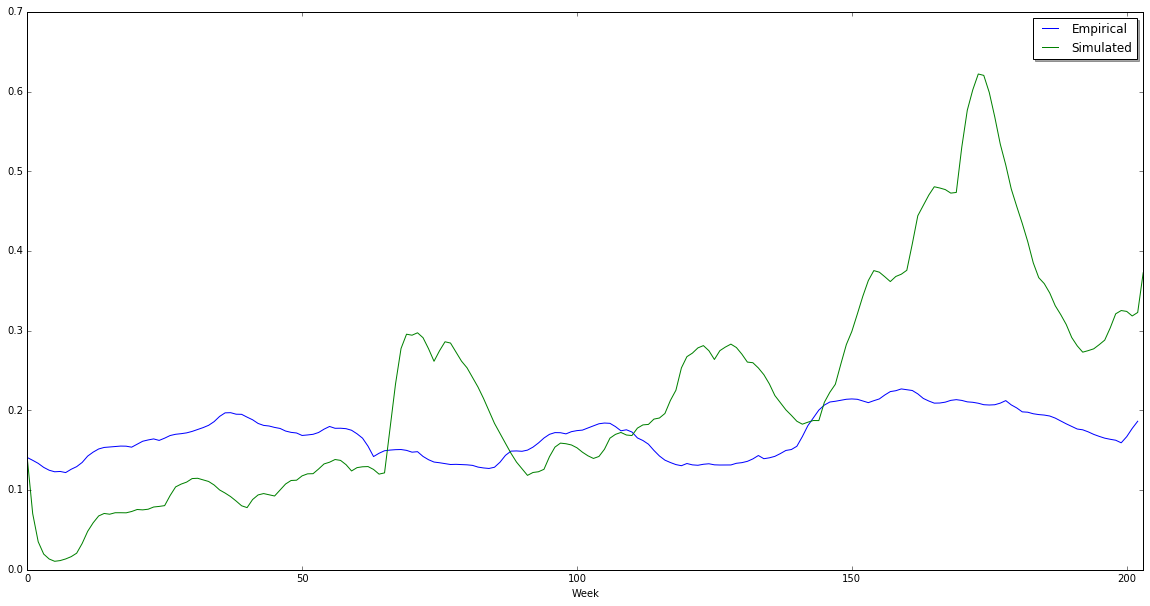

In [31]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
g.node['polls']['emp_data'].plot(ax=ax, label='Empirical')
pd.Series(g.node['polls']['status']).plot(ax=ax, label='Simulated')
ax.legend(loc='best', shadow=True)
fig.savefig('Final_results.png')